In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tk

import os
import ntpath
import re

from matplotlib.colors import ListedColormap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
import os
import ntpath
import re
from matplotlib.colors import ListedColormap
from scipy.stats import pearsonr

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
import matplotlib as mpl
from matplotlib import rc, rcParams

from scipy.optimize import curve_fit
import matplotlib as mpl
import pickle
import seaborn as sns

In [2]:
plt.rcParams["font.family"] = "Arial"

plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42

mpl.font_manager.FontManager()


# make the numbers on axis bold
rc('font', weight='bold')

In [3]:
with open('./../../../data/trainingsets/image.pickle', 'rb') as f:
    X_smiles00, SMILES00, y_original_pubqc = pickle.load(f)

In [4]:
# manually replace the TDDFT results 
# read the .out files and get gap values
gauss_outs = []
output_counter = 0
gaps_read_counter = 0
outputtddft_names = []

for filename in os.listdir():
    if filename.endswith("tddft.out"):
        #print(os.path.join( filename))
        gauss_out = ntpath.basename(filename)
        gauss_outs.append(gauss_out)
        output_counter += 1
    elif filename.endswith(".csv"):
        Desired_gaps = os.path.join(filename)
    else:
        continue

gaps_tddft = []
for gauss in gauss_outs:
    convergence_check = 0
    gauss_path =  gauss
    f = open(gauss_path,'r')
    liness = f.readlines()
    #print (liness[-1])
    homo_count = 0
    #if '### All Done ###\n' in liness:
        #if liness[-2][1:7]=='Normal':
    for count, line in enumerate(liness):
        if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
            homo_count += 1
    counter = 0
    for count, line in enumerate(liness):
        if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
            counter += 1
            if counter == homo_count:
                gaps_read_counter += 1
                convergence_check = 1
                homo_gap = liness[count].split()
                print (homo_gap)
                lumo_gap = liness[count+1].split()
                print (lumo_gap)
                outputtddft_names.append(gauss)
                #print (gap_line[2])
                # 1 Hurtree = 27.2114 (eV) 
                gaps_tddft.append(27.2114079527*(float(lumo_gap[4]) - float (homo_gap[-1])))
            #else:
                #print ("gauss did not converged properly", gauss)
    #else:
        #print ("gauss did not converged properly", gauss)
print (gaps_tddft)
print (outputtddft_names)

['Alpha', 'occ.', 'eigenvalues', '--', '-0.30363', '-0.30077', '-0.29771', '-0.24503', '-0.23404']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.00416', '0.00228', '0.00925', '0.01296', '0.01787']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.32752', '-0.32358', '-0.29897', '-0.28177', '-0.24953']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.00624', '0.00253', '0.01356', '0.01668', '0.02614']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.27908', '-0.26188', '-0.15972']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.05991', '0.00414', '0.00701', '0.01447', '0.01896']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.30995', '-0.28059', '-0.27289']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.00597', '0.00309', '0.00630', '0.01091', '0.02137']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.30774', '-0.30356', '-0.29553', '-0.20502']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.00015', '0.01174', '0.01389', '0.01447', '0.03055']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.33391', '-0.33061', '-0.27186', '-0.24954'

In [5]:
print ("Total output files: ", output_counter)
print ("Total successfully read gaps: ", gaps_read_counter)
print ("all done")
#search through the excel file to find Desired gap
#ff = open(Desired_gaps,'r')
gen_desired = pd.read_csv(Desired_gaps)
#gen_desired = gen_desired.reset_index()

# get rid of .out form output files
outputtddft_names = [i.replace("_tddft.out","") for i in outputtddft_names]
print ("output names before conversion--------------------->\n", outputtddft_names)

for jj,ii in enumerate(outputtddft_names):
    p_counter = 0
    for kk,char in enumerate(ii):
        
        # insert "=" instead of "d", "#" instead of "t", '(' instead of q, ')' instead of r
        outputtddft_names[jj] = outputtddft_names[jj].replace("q","(")
        outputtddft_names[jj] = outputtddft_names[jj].replace("r",")")
        outputtddft_names[jj] = outputtddft_names[jj].replace("d","=")
        outputtddft_names[jj] = outputtddft_names[jj].replace("t","#")

print ("output names after conversion------------------------->\n ", outputtddft_names)
outputtddft_names

Total output files:  260
Total successfully read gaps:  58
all done
output names before conversion--------------------->
 ['CCC1CCCdCCqCrqCrCC1qCrN', 'CCOCqCOrCCCqCrO', 'CCCCC1CdCC2dCCqOCrdC21', 'CCCCqCrCqCCOrCCqCrO', 'CC1CCCNqCrCqCrCC1', 'CCCdCCCdCqCCCrCqCrdO', 'CCCqCOrCCqCrCCCCOC', 'CCCCCCCCCqCOrCCCCdO', 'CCCCqNCNCCCqCrCrNOC', 'CC1CCqCrqCrOO1', 'CCCCCCCNCqCrCCCqCrCC', 'CCCCNCqCCCrC1qCrCC1O', 'CCCC1CCCC1CCCqCrOC', 'CCCCCCCCCdCqCCCrOO', 'CCCCC1CCC1CCCqCrC', 'CCCCCOCCC1COCC1C', 'CCN1CCqOCqCrdOrCC1CN', 'CdCCCqCrCCCqCOrCCCCO', 'COc1cccqOrc2c3cccqc1-3rCC2', 'CCCCCCqCCqCrOrCqCrO', 'CCqOrCC1CCCCC1CCCCO', 'CC1CCCCqCqCrCrCCC1', 'CCCqCrCqCOrCqCrCqCrdCN', 'CCqCCOrCCCCCCqOrCOO', 'CCdCC1CCdC1C1CdCCdC1', 'CtCCCNC1CCCqCCCrN1CC', 'CCqCrCCOCC1qCrOCC1C', 'CC1dCCdCCqNrdC2CdCCdCCqNrdCC12N', 'CCqCrCqCrCqOrC1CC1O', 'CCCCqCCCrOCCCqCrCC', 'CdNCCqCOrCqCCrCN', 'CCOCqdOrCqCCOCCqCrCrOC', 'CCCOCC1dCCdCqCCrCdCO1', 'COCCqdOrCOCCSCqCrCO', 'CdC1CC1CqOrCqOrCCCO', 'CCCqCrOCqCCqCrCrNOC', 'CC1CC2CCOCC2CC1OO', 'CCC1dCCdCC

['CCC1CCC=CC(C)(C)CC1(C)N',
 'CCOC(CO)CCC(C)O',
 'CCCCC1C=CC2=CC(OC)=C21',
 'CCCC(C)C(CCO)CC(C)O',
 'CC1CCCN(C)C(C)CC1',
 'CCC=CCC=C(CCC)C(C)=O',
 'CCC(CO)CC(C)CCCCOC',
 'CCCCCCCCC(CO)CCCC=O',
 'CCCC(NCNCCC(C)C)NOC',
 'CC1CC(C)(C)OO1',
 'CCCCCCCNC(C)CCC(C)CC',
 'CCCCNC(CCC)C1(C)CC1O',
 'CCCC1CCCC1CCC(C)OC',
 'CCCCCCCCC=C(CCC)OO',
 'CCCCC1CCC1CCC(C)C',
 'CCCCCOCCC1COCC1C',
 'CCN1CC(OC(C)=O)CC1CN',
 'C=CCC(C)CCC(CO)CCCCO',
 'COc1ccc(O)c2c3ccc(c1-3)CC2',
 'CCCCCC(CC(C)O)C(C)O',
 'CC(O)CC1CCCCC1CCCCO',
 'CC1CCCC(C(C)C)CCC1',
 'CCC(C)C(CO)C(C)C(C)=CN',
 'CC(CCO)CCCCCC(O)COO',
 'CC=CC1CC=C1C1C=CC=C1',
 'C#CCCNC1CCC(CCC)N1CC',
 'CC(C)CCOCC1(C)OCC1C',
 'CC1=CC=CC(N)=C2C=CC=CC(N)=CC12N',
 'CC(C)C(C)C(O)C1CC1O',
 'CCCC(CCC)OCCC(C)CC',
 'C=NCC(CO)C(CC)CN',
 'CCOC(=O)C(CCOCC(C)C)OC',
 'CCCOCC1=CC=C(CC)C=CO1',
 'COCC(=O)COCCSC(C)CO',
 'C=C1CC1C(O)C(O)CCCO',
 'CCC(C)OC(CC(C)C)NOC',
 'CC1CC2CCOCC2CC1OO',
 'CCC1=CC=CC=CSC=C=CC=C1',
 'C#CC1=CC(CCCCCCC)C1CCC',
 'CCOC(O)C(OC)C(C)CC=O',
 'CCCC(CN)C(CC)CCC

In [6]:
# choose the SMILES that we have DFT values

# create .csv file
dft_smiles_gap = {}
for smile in outputtddft_names:
    dft_smiles_gap['SMILES'] = outputtddft_names 
    dft_smiles_gap['DFT_gap'] = gaps_tddft

    #output['Desired_gap'] = gen_desired['gap']

dft_smiles_gap = pd.DataFrame(dft_smiles_gap)
merged_output = pd.merge(gen_desired, dft_smiles_gap, on='SMILES') 

# !!!! Check which one is smaller
merged_output["RE_dft_des"] = np.abs((merged_output["DFT_gap"] - merged_output["des_gap"])/ merged_output["des_gap"]*100)
merged_output["RE_des_dft"] = np.abs((merged_output["DFT_gap"] - merged_output["des_gap"])/ merged_output["DFT_gap"]*100)
merged_output["RE_dft_pred"] = np.abs((merged_output["DFT_gap"] - merged_output["pred_gap"])/ merged_output["pred_gap"]*100)
merged_output["RE_pred_dft"] = np.abs((merged_output["DFT_gap"] - merged_output["pred_gap"])/ merged_output["DFT_gap"]*100)

output = pd.DataFrame(merged_output)
output.to_csv('./output/output_{}'.format(Desired_gaps), index=False)

print ("average of RE: {} and Min: {} and Max: {}".\
       format(np.mean(np.abs(merged_output["RE_des_dft"])), min(merged_output["RE_des_dft"]), max(merged_output["RE_des_dft"])))
print ("Total samples wrote in the output: ",len(output))

average of RE: 49.44627246710925 and Min: 0.09977180801039374 and Max: 1004.1481085318215
Total samples wrote in the output:  58


In [7]:
# choose the SMILES that we have DFT values

# create .csv file
dft_smiles_gap = {}
for smile in outputtddft_names:
    dft_smiles_gap['SMILES'] = outputtddft_names 
    dft_smiles_gap['TDDFT_gap'] = gaps_tddft

    #output['Desired_gap'] = gen_desired['gap']

dft_smiles_gap = pd.DataFrame(dft_smiles_gap)
merged_output = pd.merge(gen_desired, dft_smiles_gap, on='SMILES') 
# !!!! Check which one is smaller
merged_output["RE_dft_des"] = np.abs((merged_output["TDDFT_gap"] - merged_output["des_gap"])/ merged_output["des_gap"]*100)
merged_output["RE_des_dft"] = np.abs((merged_output["TDDFT_gap"] - merged_output["des_gap"])/ merged_output["TDDFT_gap"]*100)
merged_output["RE_dft_pred"] = np.abs((merged_output["TDDFT_gap"] - merged_output["pred_gap"])/ merged_output["pred_gap"]*100)
merged_output["RE_pred_dft"] = np.abs((merged_output["TDDFT_gap"] - merged_output["pred_gap"])/ merged_output["TDDFT_gap"]*100)

output_tddft = pd.DataFrame(merged_output)
output_tddft

,SMILES,des_gap,pred_gap,Err_pred_des,AE,TDDFT_gap,RE_dft_des,RE_des_dft,RE_dft_pred,RE_pred_dft
0,CC1=CC=CC(N)=C2C=CC=CC(N)=CC12N,3.3231,3.076171,0.074307,0.246929,3.090672,6.994321,7.520316,0.471388,0.469177
1,COc1ccc(O)c2c3ccc(c1-3)CC2,3.6632,3.695144,0.008720,0.031944,3.617757,1.240536,1.256119,2.094290,2.139088
2,CCNC1NC1C1CCC=CCNCC1,3.8512,6.536631,0.697297,2.685431,5.737253,48.973132,32.873802,12.229201,13.933109
3,CC=CC1CC=C1C1C=CC=C1,4.5117,5.020835,0.112848,0.509135,5.211801,15.517454,13.432995,3.803462,3.664099
4,CCC1=CC=CC=CSC=C=CC=C1,4.5639,3.530383,0.226455,1.033517,0.413341,90.943244,1004.148109,88.291885,754.108484
5,CCC1CCC=CC(C)(C)CC1(C)N,4.8965,6.777451,0.384142,1.880952,6.255358,27.751628,21.723111,7.703383,8.346333
6,C=CCNCCCCC1=CC(=O)C(C)CC1,5.4036,4.930735,0.087509,0.472865,5.014790,7.195381,7.753258,1.704723,1.676149
7,CCCCC1C=CC2=CC(OC)=C21,5.5104,4.916517,0.107775,0.593883,2.715971,50.711915,102.888792,44.758241,81.022477
8,CCOC(=O)C=CC(C)C(=O)O,5.6595,5.378988,0.049565,0.280512,5.638748,0.366676,0.368026,4.829155,4.606690
9,CCCOCC1=CC=C(CC)C=CO1,5.9830,4.827563,0.193120,1.155437,4.501039,24.769531,32.924865,6.763750,7.254421


In [8]:
# read the .out files and get gap values
gauss_outs = []
output_counter = 0
gaps_read_counter = 0
output_names = []

for filename in os.listdir():
    if filename.endswith(".out"):
        #print(os.path.join( filename))
        gauss_out = ntpath.basename(filename)
        gauss_outs.append(gauss_out)
        output_counter += 1
    elif filename.endswith(".csv"):
        Desired_gaps = os.path.join(filename)
    else:
        continue

In [9]:
gaps_dft = []
for gauss in gauss_outs:
    convergence_check = 0
    f = open(gauss,'r')
    liness = f.readlines()
    #print (liness[-1])
    homo_count = 0
    if '### All Done ###\n' in liness:
        if liness[-2][1:7]=='Normal':
            for count, line in enumerate(liness):
                if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
                    homo_count += 1
            counter = 0
            for count, line in enumerate(liness):
                if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
                    counter += 1
                    if counter == homo_count:
                        gaps_read_counter += 1
                        convergence_check = 1
                        homo_gap = liness[count].split()
                        print (homo_gap)
                        lumo_gap = liness[count+1].split()
                        print (lumo_gap)
                        output_names.append(gauss)
                        #print (gap_line[2])
                        # 1 Hurtree = 27.2114 (eV) 
                        gaps_dft.append(27.22 *(float(lumo_gap[4]) - float (homo_gap[-1])))
        else:
            print ("gauss did not converged properly1", gauss)
    else:
        if liness[-1][1:7]=='Normal':
            for count, line in enumerate(liness):
                if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
                    homo_count += 1
            counter = 0
            for count, line in enumerate(liness):
                if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
                    counter += 1
                    if counter == homo_count:
                        gaps_read_counter += 1
                        convergence_check = 1
                        homo_gap = liness[count].split()
                        print (homo_gap)
                        lumo_gap = liness[count+1].split()
                        print (lumo_gap)
                        output_names.append(gauss)
                        #print (gap_line[2])
                        # 1 Hurtree = 27.21141 (eV) 
                        gaps_dft.append(27.22 *(float(lumo_gap[4]) - float (homo_gap[-1])))
        else:   
            print ("gauss did not converged properly2", gauss)

gauss did not converged properly1 CNC1dCqCrC2dCdCCdCCqdCC3CCdCC3dN2rC1.out
['Alpha', 'occ.', 'eigenvalues', '--', '-0.31518', '-0.31488', '-0.29704', '-0.26554', '-0.26164']
['Alpha', 'virt.', 'eigenvalues', '--', '0.08961', '0.09495', '0.09661', '0.09990', '0.10795']
gauss did not converged properly2 CdCqCrCqCqCCdOrCCCCCCCrC1CCCC1_tddft.out
['Alpha', 'occ.', 'eigenvalues', '--', '-0.25132', '-0.24835']
['Alpha', 'virt.', 'eigenvalues', '--', '0.02327', '0.07675', '0.08608', '0.09168', '0.10720']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.43406', '-0.42705', '-0.38487']
['Alpha', 'virt.', 'eigenvalues', '--', '0.09528', '0.09528', '0.18770', '0.19456', '0.21909']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.26888', '-0.25559', '-0.23005', '-0.22100', '-0.21595']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.02568', '0.02504', '0.03703', '0.05271', '0.07435']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.25045', '-0.24136', '-0.21875']
['Alpha', 'virt.', 'eigenvalues', '--', '0.07334', '0.0900

In [10]:
print ("Total output files: ", output_counter)
print ("Total successfully read gaps: ", gaps_read_counter)
print ("all done")
#search through the excel file to find Desired gap
#ff = open(Desired_gaps,'r')
gen_desired = pd.read_csv(Desired_gaps)
#gen_desired = gen_desired.reset_index()

# get rid of .out form output files
output_names = [i.replace(".out","") for i in output_names]
print ("output names before conversion--------------------->\n", output_names)

for jj,ii in enumerate(output_names):
    p_counter = 0
    for kk,char in enumerate(ii):
        
        # insert "=" instead of "d", "#" instead of "t", '(' instead of q, ')' instead of r
        output_names[jj] = output_names[jj].replace("q","(")
        output_names[jj] = output_names[jj].replace("r",")")
        output_names[jj] = output_names[jj].replace("d","=")
        output_names[jj] = output_names[jj].replace("t","#")

print ("output names after conversion------------------------->\n ", output_names)

Total output files:  1300
Total successfully read gaps:  897
all done
output names before conversion--------------------->
 ['CCCCCCCCCC1CC1CCC', 'CdCCCCqCCrOCqCOrOC', 'FCqFrqFrCqFrqFrF', 'CdCNCCqOOrdCqCrCNSC', 'CCCOCCCNCqCrCC1CCCCO1', 'COCOC1CCqOCqOrCqCrCrCCO1', 'CNqNrCdC1CCqSrCC1CCO', 'CCCCqCCCrCCCCqCrOCC', 'CCCqdOrC1SCC1CdCCtN', 'CCqCrCNdCC1CCCCCCO1', 'CCCCCqCrCC', 'CdC1CCqCCrdCCqNCOrC1C', 'CCCCCC1CCCC1', 'CCCCqCrCOCC1ON1CqdOrCOC', 'CC12CCC3C1CC32', 'CCCqCrqCrCqFrqFrF', 'CdC1CC1CqOrCqOrCCCO', 'CC1CC1CqFrqFrF', 'C1dNCN2COCCCCCCqC2rNN1', 'CCqCrCqCrqCrCF', 'CCdC1CdCCqCCrdCqCSrCdC1', 'CCCC1dCCdCqCSrSCdC1', 'CCqOrCC1CCCCC1CCCCO', 'OdCC1CqdOrOCqCCOrCdC1CO', '[CH]NdCN1CqdOrC1C', 'CCCqCrCCCCOCCqCrCC', 'CdCCCCCqdOrCNqCrC1qCrCqdOrC1CCCC', 'CCqCrCqFrqFrF', 'CCqOrCqdCdOrC1CCCCqNNPCqOrOOOrCC1', 'CCCC1dCCdCC1qNrCqOrOCOC', 'CdC1CqdCCCqCrOrCdC1CO', 'OdCqOrn1cccqdOrc2c1CCdCC2', 'CCC1dCdCNdCqCqCCCCqCrNrCOOrC1', 'CCCCqCOrCCOCCCqCCrCC', 'CdCCNCOOCC1CC1CqCrCC', 'CCCCC1CCCOCCC1C1CO1', 'CCC1CCCC1COCCCCCqC

In [11]:
# choose the SMILES that we have DFT values

# create .csv file
dft_smiles_gap = {}
for smile in output_names:
    dft_smiles_gap['SMILES'] = output_names 
    dft_smiles_gap['DFT_gap'] = gaps_dft

    #output['Desired_gap'] = gen_desired['gap']

dft_smiles_gap = pd.DataFrame(dft_smiles_gap)
merged_output = pd.merge(gen_desired, dft_smiles_gap, on='SMILES') 

# !!!! Check which one is smaller
merged_output["RE_dft_des"] = np.abs((merged_output["DFT_gap"] - (merged_output["des_gap"]))/ merged_output["des_gap"]*100)
merged_output["RE_des_dft"] = np.abs((merged_output["DFT_gap"] - (merged_output["des_gap"]))/ merged_output["DFT_gap"]*100)
merged_output["RE_dft_pred"] = np.abs((merged_output["DFT_gap"] - merged_output["pred_gap"])/ merged_output["pred_gap"]*100)
merged_output["RE_pred_dft"] = np.abs((merged_output["DFT_gap"] - merged_output["pred_gap"])/ merged_output["DFT_gap"]*100)

output = pd.DataFrame(merged_output)
output.to_csv('./output/output_{}'.format(Desired_gaps), index=False)

print ("average of RE: {} and Min: {} and Max: {}".\
       format(np.mean(np.abs(merged_output["RE_des_dft"])), min(merged_output["RE_des_dft"]), max(merged_output["RE_des_dft"])))
print ("Total samples wrote in the output: ",len(output))

average of RE: 16.036779235092272 and Min: 0.09217778747791067 and Max: 115.19603245129207
Total samples wrote in the output:  631


In [12]:
## Statistics  (# DFT=True value, Des=prediction)

# total # of samples
N = len(merged_output["des_gap"])
print ("number of samples: ", N)
# Explained Variance R2 from sklearn.metrics.explained_variance_score
explained_variance_R2_DFT_des = explained_variance_score(merged_output["DFT_gap"], merged_output["des_gap"])
print ("explained_varice_R2_DFT_des", explained_variance_R2_DFT_des)

# mean absolute error 
MAE_DFT_des = mean_absolute_error(merged_output["DFT_gap"], merged_output["des_gap"])
print ("MAE_DFT_des", MAE_DFT_des)
MAE_DFT_des_=0
for dft, des in zip(merged_output["DFT_gap"], merged_output["des_gap"]):
    MAE_DFT_des_ = MAE_DFT_des_ + abs(des-dft)
MAE_DFT_des = MAE_DFT_des_/N
print ("MAE_DFT_des_manuallycal:", MAE_DFT_des)
# Fractioned MAE, more normalized
Fractioned_MAE_DFT_des = 0
for dft, des in zip(merged_output["DFT_gap"], merged_output["des_gap"]):
    Fractioned_MAE_DFT_des = Fractioned_MAE_DFT_des +  abs(des-dft)/des
Fractioned_MAE_DFT_des = Fractioned_MAE_DFT_des/N
print ("FMAE_DFT_des_manuallycal", Fractioned_MAE_DFT_des)

# root mean squared error (RMSE), sqrt(sklearn ouputs MSE)
RMSE_DFT_des = mean_squared_error(merged_output["DFT_gap"], merged_output["des_gap"])**0.5
print ("RMSE_DFT_des", RMSE_DFT_des)

Fractioned_RMSE_DFT_des = 0
for dft, des in zip(merged_output["DFT_gap"], merged_output["des_gap"]):
    Fractioned_RMSE_DFT_des = Fractioned_RMSE_DFT_des + ((des-dft)/des)**2
Fractioned_RMSE_DFT_des = (Fractioned_RMSE_DFT_des/N)**0.5
print ("Fractioned_RMSE_DFT_des", Fractioned_RMSE_DFT_des)



number of samples:  631
explained_varice_R2_DFT_des 0.48171754347135365
MAE_DFT_des 1.028476801267829
MAE_DFT_des_manuallycal: 1.0284768012678287
FMAE_DFT_des_manuallycal 0.14819394225564014
RMSE_DFT_des 1.315992488954385
Fractioned_RMSE_DFT_des 0.1982292615624295


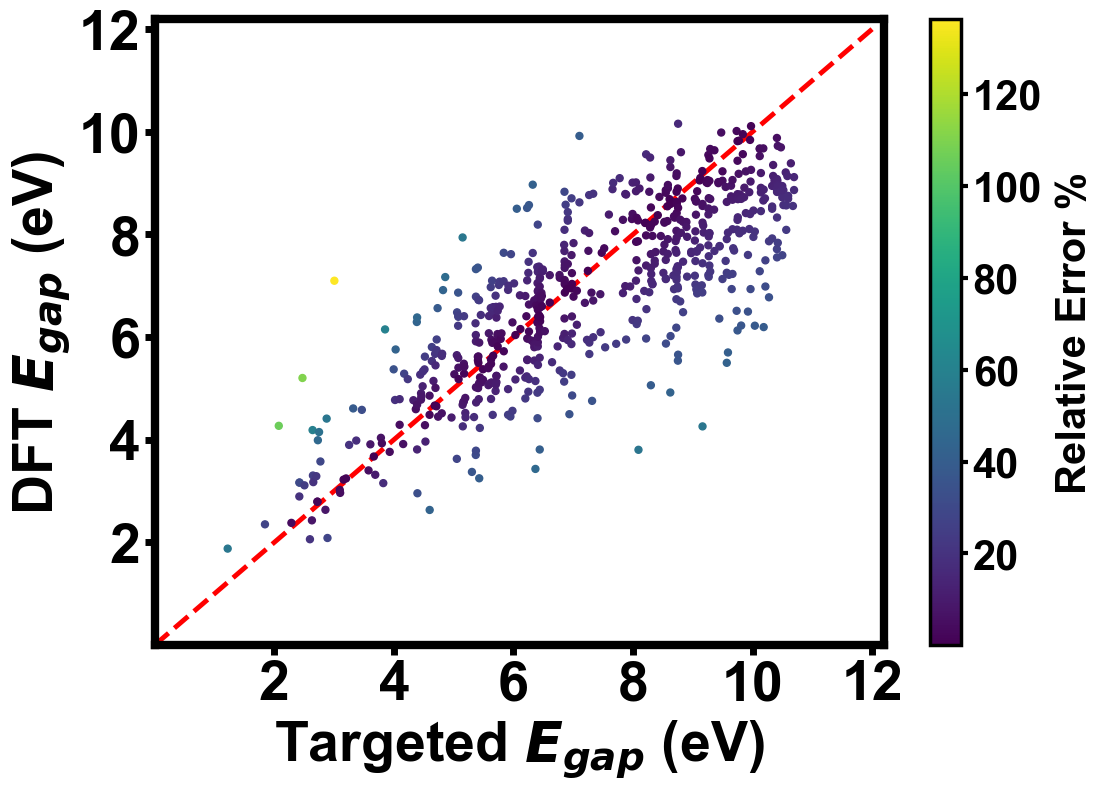

In [13]:
label_fontsize = 40
fig_size_x = 14*0.8
fig_size_y = 10*0.8
axis_size = 40
marker_size = 25

gap_range = (0, 12)
cMap = ListedColormap(['white', 'green', 'blue','red'])

Desired_gap = output["des_gap"]
DFT_gap = output["DFT_gap"]


col = output['RE_dft_des']
col_orig = np.copy(col)

mpl.rcParams['axes.linewidth'] = 2.5
fig, ax = plt.subplots(figsize = (fig_size_x, fig_size_y))
plt.scatter(Desired_gap, DFT_gap, s=marker_size, c=col_orig)

ax.tick_params(axis='both', which='major', labelsize=25)

plt.xlabel(r'Targeted $E_{gap}$ (eV)', fontsize=label_fontsize, 
           fontname='Arial', fontweight="bold", labelpad=5)
plt.ylabel(r'DFT $E_{gap}$ (eV)', fontsize=label_fontsize, 
           fontname='Arial', fontweight="bold", labelpad=5)

ax.tick_params(axis='both', which='major', labelsize=axis_size, width=5, length=7)
[i.set_linewidth(6) for i in ax.spines.values()]

plt.xlim(0, 12.2)
plt.ylim(0, 12.2)
# how many numbers on the axes, delta
ax.xaxis.set_major_locator(tk.MultipleLocator(7))
ax.yaxis.set_major_locator(tk.MultipleLocator(7))
ax.grid(False)

lims=[gap_range[0], gap_range[1]]
plt.plot(lims, lims, '--', linewidth=3.5, c='red', alpha=1, zorder=0)


cbar = plt.colorbar(shrink=1)

#cbar.ax.set_ticks(20)

plt.xticks ((2, 4, 6, 8, 10, 12))
plt.yticks ((2, 4, 6, 8, 10, 12))

#cbar.set_ticks(loacator)
cbar.ax.set_ylabel('Relative Error %', fontsize=30, fontname='Arial', fontweight='bold', labelpad=10)
cbar.ax.tick_params(axis='both', which='major', labelsize=30,  width=3, length=5)

#cbar.ax.yaxis.set_major_locator(tk.MultipleLocator(0.5))
#cbar.solids.set_edgecolor("face")
#plt.draw()
plt.tight_layout()
plt.savefig('DFT_Des.png', dpi = 500, bbox_inches='tight')

In [14]:
re_less_20_big_10 = np.sum( (output['RE_des_dft'].values > 20) &  (output['RE_des_dft'].values <= 30) )
print (re_less_20_big_10/output['RE_des_dft'].shape)

[0.15055468]


In [15]:
re_big_20 = np.sum(output['RE_dft_des'].values > 30)
print (re_big_20/output['RE_dft_des'].shape)

[0.09667195]


In [16]:
3/631*100

0.4754358161648178

In [17]:
output.loc[output['DFT_gap']>10]

,SMILES,des_gap,pred_gap,Err_pred_des,AE,DFT_gap,RE_dft_des,RE_des_dft,RE_dft_pred,RE_pred_dft
445,CCCCC(CC)C(C)(C)F,8.7543,9.728599,0.111294,0.974299,10.156871,16.021507,13.809084,4.402194,4.216572
540,CCCCCCCCCCCCCCCCCCCC,9.7336,9.940207,0.021226,0.206607,10.014782,2.888781,2.807674,0.750235,0.744648
572,CCCCCCC1CCC(CCCCC)C1,9.9745,9.617000,0.035841,0.357500,10.110052,1.358989,1.340769,5.126884,4.876853


[0.41362916]
[0.33597464]
[0.15372425]
[0.09667195]


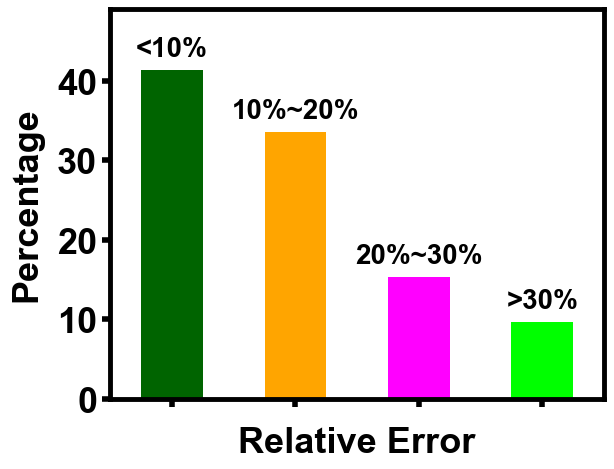

In [18]:
# make the numbers on axis bold
#rc('font', weight='bold')

re_less_10 = np.sum(output['RE_dft_des'].values <= 10)
print (re_less_10/output['RE_dft_des'].shape)

re_less_20_big_10 = np.sum( (output['RE_dft_des'].values > 10) &  (output['RE_dft_des'].values <= 20) )
print (re_less_20_big_10/output['RE_dft_des'].shape)

re_less_30_big_20 = np.sum( (output['RE_dft_des'].values > 20) &  (output['RE_dft_des'].values <= 30) )
print (re_less_30_big_20/output['RE_dft_des'].shape)

re_big_30 = np.sum(output['RE_dft_des'].values > 30)
print (re_big_30/output['RE_dft_des'].shape)


plt.close()

plt.bar(['<10%', '10% - 20%', '20% - 30%', '>30%'],
        [re_less_10/len(output), re_less_20_big_10/len(output), re_less_30_big_20/len(output), 
         re_big_30/len(output)],
        color = ['green', 'blue', 'red'],
        alpha = 0.7)

plt.close()
plt.figure(figsize = (7.8*0.8, 6*0.8))
frequencies = [re_less_10/len(output)*100, re_less_20_big_10/len(output)*100, 
               re_less_30_big_20/len(output)*100, re_big_30/len(output)*100]
freq_series = pd.Series(frequencies)
ax = freq_series.plot(kind='bar', color = ['darkgreen', 'orange', 'magenta', 'lime'])



rects = ax.patches
x_labels = [ ]
labels = ['<10%', '10%~20%', '20%~30%', '>30%']

# define the width of the border
[i.set_linewidth(3.5) for i in ax.spines.values()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label, fontsize=20, fontweight='bold',
            ha='center', va='bottom')

ax.set_xticklabels(x_labels)
plt.ylim(0, 49)
ax.tick_params(axis='both', which='major', labelsize=26, width=4, length=6)
#plt.yticks(fontsize = 22)
plt.ylabel("Percentage", fontsize=26, fontweight='bold', fontname='Arial', labelpad=10)
plt.xlabel("Relative Error", fontsize=26, fontweight='bold', labelpad=10, fontname='Arial')

plt.tight_layout()
plt.savefig('RE_dft_des.jpeg', dpi=500, bbox_inches='tight')

10.1568708
631


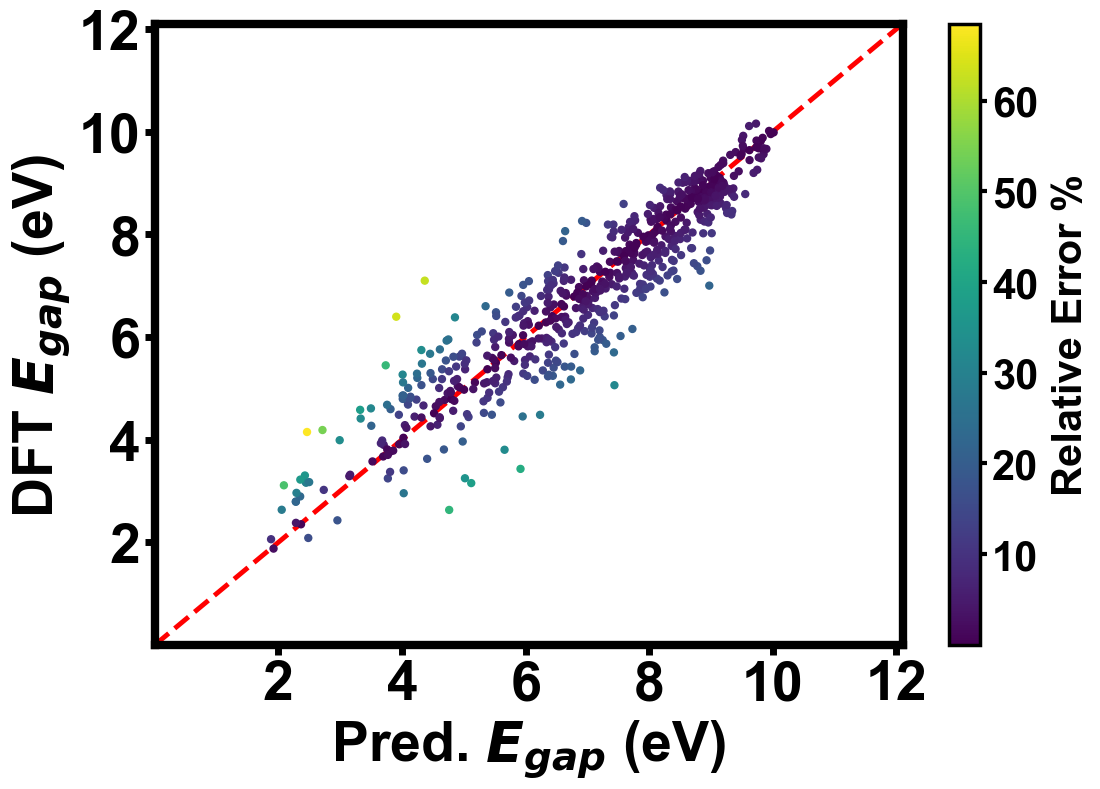

In [19]:
# make the numbers on axis bold

#rc('font', weight='bold')

gap_range = (0, 12.1)
pred_gap_range = (0, 12.1)
cMap = ListedColormap(['white', 'green', 'blue','red'])

predicted_gap = output["pred_gap"]
DFT_gap = output["DFT_gap"]
coll = output["RE_dft_pred"]


col = np.abs((DFT_gap-predicted_gap)/DFT_gap*100)
col_orig = np.copy(col)

#plt.figure(figsize = (8, 7))
#mpl.rcParams['axes.linewidth'] = 2.5
fig, ax = plt.subplots(figsize = (fig_size_x, fig_size_y))

plt.scatter(predicted_gap, DFT_gap, s=marker_size, c=coll)

ax.tick_params(axis='both', which='major', labelsize=40, width=5, length=7)

plt.xlabel(r'Pred. $E_{gap}$ (eV)', fontsize=label_fontsize, 
           fontname='Arial', fontweight="bold", labelpad=5)
plt.ylabel(r'DFT $E_{gap}$ (eV)', fontsize=label_fontsize, 
           fontname='Arial', fontweight="bold", labelpad=5)

plt.xlim(pred_gap_range)
plt.ylim(gap_range)
# how many numbers on the axes, delta
ax.xaxis.set_major_locator(tk.MultipleLocator(7))
ax.yaxis.set_major_locator(tk.MultipleLocator(7))
[i.set_linewidth(6) for i in ax.spines.values()]
lims=[gap_range[0], gap_range[1]]
plt.plot(lims, lims, '--', linewidth=3.5, c='red', alpha=1, zorder=0)


cbar = plt.colorbar(shrink=1)

plt.xticks ((2, 4, 6, 8, 10, 12))
plt.yticks ((2, 4, 6, 8, 10, 12))

#cbar.set_ticks(loacator)
cbar.ax.set_ylabel('Relative Error %', fontsize=30, fontname='Arial', fontweight='bold', labelpad=10)
cbar.ax.tick_params(axis='both', which='major', labelsize=30,  width=3, length=5)

#cbar.ax.yaxis.set_major_locator(tk.MultipleLocator(0.5))
#cbar.solids.set_edgecolor("face")
#plt.draw()
plt.tight_layout()
plt.savefig('DFT_pred.png', dpi = 500, bbox_inches='tight')

print (np.max(DFT_gap))
print (len(output["DFT_gap"]))

In [20]:
output.loc[output['RE_dft_pred']>30].loc[output['DFT_gap']>6]

,SMILES,des_gap,pred_gap,Err_pred_des,AE,DFT_gap,RE_dft_des,RE_des_dft,RE_dft_pred,RE_pred_dft
41,O=C1C=C2C=C1C1CCCC1C2,3.0031,4.367683,0.454391,0.364583,7.097071,136.324818,57.685358,62.490515,38.457946
53,C=CCC1=CCC(OC)C=CC1,4.3875,4.856336,0.106857,0.468836,6.381729,45.452513,31.249039,31.410368,23.902504
95,CCC1C=CC=CC=C(C)CC(O)C1,5.0763,3.906169,0.230509,1.170132,6.394522,25.968174,20.614869,63.703189,38.913835


[0.69730586]
[0.21394612]
[0.05546751]
[0.03328051]


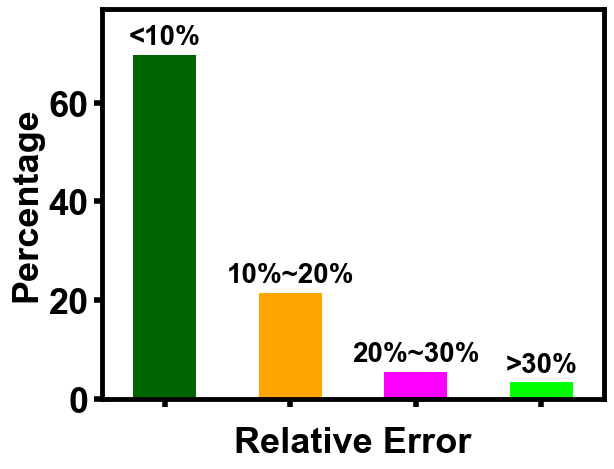

In [21]:
# make the numbers on axis bold
#rc('font', weight='bold')

re_less_10 = np.sum(output['RE_dft_pred'].values <= 10)
print (re_less_10/output['RE_dft_pred'].shape)

re_less_20_big_10 = np.sum( (output['RE_dft_pred'].values > 10) &  (output['RE_dft_pred'].values <= 20) )
print (re_less_20_big_10/output['RE_dft_pred'].shape)

re_less_30_big_20 = np.sum( (output['RE_dft_pred'].values > 20) &  (output['RE_dft_pred'].values <= 30) )
print (re_less_30_big_20/output['RE_dft_pred'].shape)

re_big_30 = np.sum(output['RE_dft_pred'].values > 30)
print (re_big_30/output['RE_dft_pred'].shape)


plt.close()

plt.bar(['<10%', '10% - 20%', '20% - 30%', '>30%'],
        [re_less_10/len(output), re_less_20_big_10/len(output), re_less_30_big_20/len(output), 
         re_big_30/len(output), ],
        color = ['green', 'blue', 'red'],
        alpha = 0.7)

plt.close()
plt.figure(figsize = (7.8*0.8, 6*0.8))
frequencies = [re_less_10/len(output)*100, re_less_20_big_10/len(output)*100, 
               re_less_30_big_20/len(output)*100, re_big_30/len(output)*100]
freq_series = pd.Series(frequencies)
ax = freq_series.plot(kind='bar', color = ['darkgreen', 'orange', 'magenta', 'lime'])

rects = ax.patches
x_labels = [ ]
labels = ['<10%', '10%~20%', '20%~30%', '>30%']

# define the width of the border
[i.set_linewidth(3.5) for i in ax.spines.values()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label, fontsize=20, fontweight='bold',
            ha='center', va='bottom')

ax.set_xticklabels(x_labels)
plt.ylim(0,79)
ax.tick_params(axis='both', which='major', labelsize=26, width=4, length=6)
#plt.yticks(fontsize = 22)
plt.ylabel("Percentage", fontsize=26, fontweight='bold', fontname='Arial')
plt.xlabel("Relative Error", fontsize=26, fontweight='bold', labelpad=10, fontname='Arial')

plt.tight_layout()
plt.savefig('RE_dft_pred.jpeg', dpi=500, bbox_inches='tight')

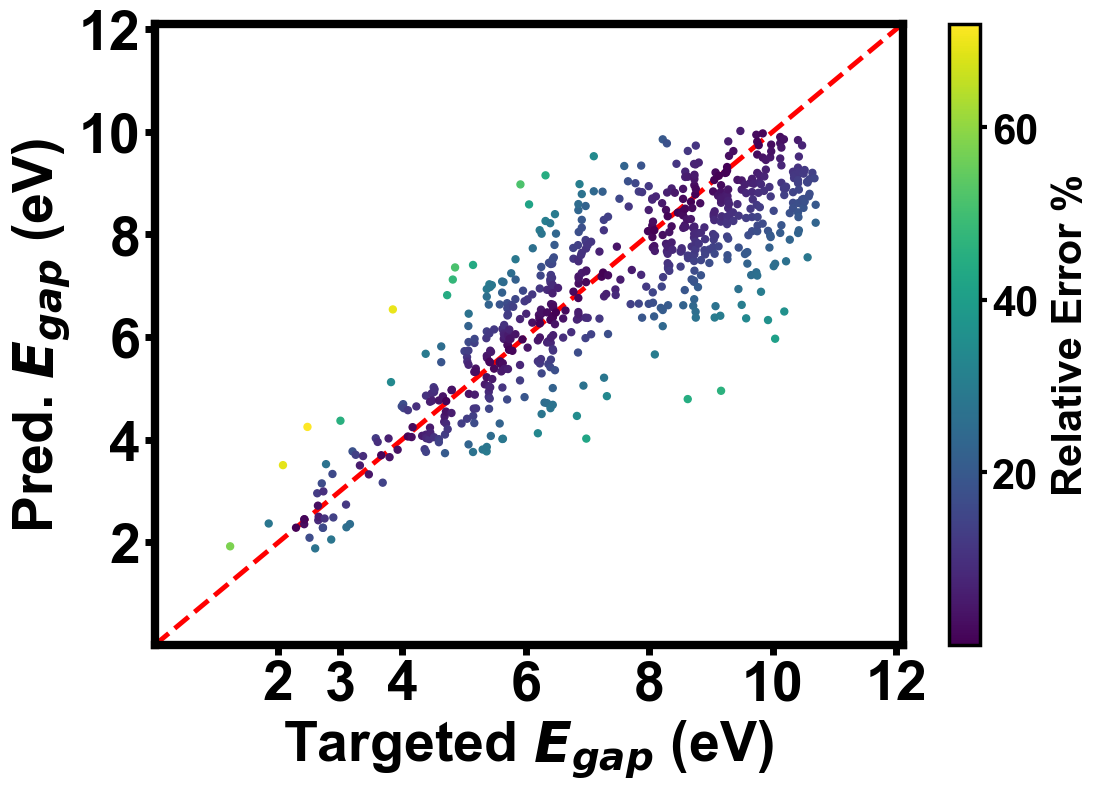

In [22]:
# make the numbers on axis bold

#rc('font', weight='bold')

gap_range = (0, 12.1)
pred_gap_range = (0, 12.1)
cMap = ListedColormap(['white', 'green', 'blue','red'])

predicted_gap = output["pred_gap"]
des_gap = output["des_gap"]
coll = 100*output["Err_pred_des"]


col = np.abs((des_gap-predicted_gap)/des_gap*100)
col_orig = np.copy(col)

#plt.figure(figsize = (8, 7))
#mpl.rcParams['axes.linewidth'] = 2.5
fig, ax = plt.subplots(figsize = (fig_size_x, fig_size_y))

plt.scatter(des_gap, predicted_gap, 
            s=marker_size, c=coll)

ax.tick_params(axis='both', which='major', labelsize=40, width=5, length=7)

plt.xlabel(r'Targeted $E_{gap}$ (eV)', fontsize=label_fontsize, 
           fontname='Arial', fontweight="bold", labelpad=5)
plt.ylabel(r'Pred. $E_{gap}$ (eV)', fontsize=label_fontsize, 
           fontname='Arial', fontweight="bold", labelpad=5)

plt.xlim(pred_gap_range)
plt.ylim(gap_range)
# how many numbers on the axes, delta
ax.xaxis.set_major_locator(tk.MultipleLocator(7))
ax.yaxis.set_major_locator(tk.MultipleLocator(7))
[i.set_linewidth(6) for i in ax.spines.values()]
lims=[gap_range[0], gap_range[1]]
plt.plot(lims, lims, '--', linewidth=3.5, c='red', alpha=1, zorder=0)


cbar = plt.colorbar(shrink=1)

plt.xticks ((2, 3,4, 6, 8, 10, 12))
plt.yticks ((2, 4, 6, 8, 10, 12))

#cbar.set_ticks(loacator)
cbar.ax.set_ylabel('Relative Error %', fontsize=30, fontname='Arial', fontweight='bold', labelpad=10)
cbar.ax.tick_params(axis='both', which='major', labelsize=30,  width=3, length=5)

#cbar.ax.yaxis.set_major_locator(tk.MultipleLocator(0.5))
#cbar.solids.set_edgecolor("face")
#plt.draw()
plt.tight_layout()
plt.savefig('des_pred.png', dpi = 500, bbox_inches='tight')

[0.45166403]
[0.36608558]
[0.13787639]
[0.04437401]


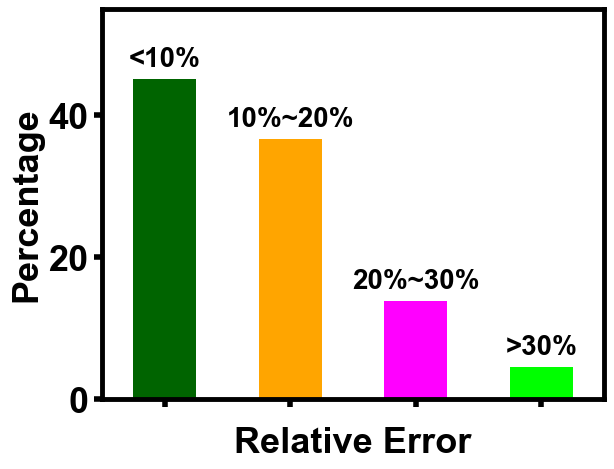

In [30]:
# make the numbers on axis bold
#rc('font', weight='bold')

re_less_10 = np.sum(output['Err_pred_des'].values <= 0.1)
print (re_less_10/output['Err_pred_des'].shape)

re_less_20_big_10 = np.sum( (output['Err_pred_des'].values > 0.1) &  (output['Err_pred_des'].values <= 0.2) )
print (re_less_20_big_10/output['Err_pred_des'].shape)

re_less_30_big_20 = np.sum( (output['Err_pred_des'].values > 0.2) &  (output['Err_pred_des'].values <= 0.3) )
print (re_less_30_big_20/output['Err_pred_des'].shape)

re_big_30 = np.sum(output['Err_pred_des'].values > 0.3)
print (re_big_30/output['Err_pred_des'].shape)


plt.close()

plt.bar(['<10%', '10% - 20%', '20% - 30%', '>30%'],
        [re_less_10/len(output), re_less_20_big_10/len(output), re_less_30_big_20/len(output), 
         re_big_30/len(output), ],
        color = ['green', 'blue', 'red'],
        alpha = 0.7)

plt.close()
plt.figure(figsize = (7.8*0.8, 6*0.8))
frequencies = [re_less_10/len(output)*100, re_less_20_big_10/len(output)*100, 
               re_less_30_big_20/len(output)*100, re_big_30/len(output)*100]
freq_series = pd.Series(frequencies)
ax = freq_series.plot(kind='bar', color = ['darkgreen', 'orange', 'magenta', 'lime'])

rects = ax.patches
x_labels = [ ]
labels = ['<10%', '10%~20%', '20%~30%', '>30%']

# define the width of the border
[i.set_linewidth(3.5) for i in ax.spines.values()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label, fontsize=20, fontweight='bold',
            ha='center', va='bottom')

ax.set_xticklabels(x_labels)
plt.ylim(0, 55)
ax.tick_params(axis='both', which='major', labelsize=26, width=4, length=6)
#plt.yticks(fontsize = 22)
plt.ylabel("Percentage", fontsize=26, fontweight='bold', fontname='Arial')
plt.xlabel("Relative Error", fontsize=26, fontweight='bold', labelpad=10, fontname='Arial')

plt.tight_layout()
plt.savefig('Err_pred_des.jpeg', dpi=500, bbox_inches='tight')

In [24]:
np.min (output['des_gap'])

1.2181

In [27]:
print (r2_score(output['pred_gap'], output['DFT_gap']))
print (mean_absolute_error(output['pred_gap'], output['DFT_gap']))

0.8702146545332867
0.5009469242472266


In [28]:
print (r2_score(output['des_gap'], output['pred_gap'], ))
print (mean_absolute_error( output['des_gap'], output['pred_gap'],))

0.7010709696075946
0.9077675968304281


In [29]:
print (r2_score(output['des_gap'], output['DFT_gap']))
print (mean_absolute_error(output['des_gap'], output['DFT_gap']))

0.6141284153235792
1.028476801267829


In [35]:
output ['des_mean'] = output['des_gap']
output ['des_mean'] = 5.94

In [36]:
print (r2_score(output['des_gap'], output ['des_mean'] ))
print (mean_absolute_error(output['des_gap'], output ['des_mean']))

-0.3947833174198647
2.073223613312203


In [80]:
# replacing TDDFT results
dft_tddft_merged = pd.merge(output, output_tddft, on='SMILES') 

In [81]:
output_TDDFT_rep = output.copy()
for smiles, tddft, dft, des in zip(dft_tddft_merged['SMILES'], dft_tddft_merged['TDDFT_gap'], dft_tddft_merged['DFT_gap'], dft_tddft_merged['des_gap_x']):
    #print (smiles, tddft, dft)
    if abs(tddft-des)<abs((dft-des)):
        print (smiles, tddft, dft, des)
        output_TDDFT_rep.loc[output_TDDFT_rep['SMILES']==smiles] = \
            output_TDDFT_rep.loc[output_TDDFT_rep['SMILES']==smiles].replace(
                {float(output_TDDFT_rep['DFT_gap'].loc[output_TDDFT_rep['SMILES']==smiles]): \
                float(dft_tddft_merged['TDDFT_gap'].loc[dft_tddft_merged['SMILES']==smiles])})

C=CCC(C)CCC(CO)CCCCO 6.888840037305532 7.465084999999999 6.2531
CC1CC(C)(C)OO1 6.831696080604862 7.6376598 6.3221
CCN1CC(OC(C)=O)CC1CN 5.767457915574765 6.2848258 5.983
CC=CC1CC=C1C1C=CC=C1 5.211800965180631 5.369145 4.5117
CCCCOCC1CC1C=CCOC 6.450464255187535 6.7486546 6.4569
CCOC(=O)C=CC(C)C(=O)O 5.638747955958494 5.6350844 5.6595
CCCC1CCCC1CCC(C)OC 7.100544791177538 8.96899 6.3221
CCNC1NC1C1CCC=CCNCC1 5.737253252747268 6.1481814 3.8512


/tmp/ipykernel_525964/3103680801.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  {float(output_TDDFT_rep['DFT_gap'].loc[output_TDDFT_rep['SMILES']==smiles]): \
/tmp/ipykernel_525964/3103680801.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(dft_tddft_merged['TDDFT_gap'].loc[dft_tddft_merged['SMILES']==smiles])})


In [82]:
output_TDDFT_rep

,SMILES,des_gap,pred_gap,Err_pred_des,AE,DFT_gap,RE_dft_des,RE_des_dft,RE_dft_pred,RE_pred_dft
0,C=C(C)CC(CCCC)C(CC)CCO,8.5081,7.370851,0.133667,1.137249,7.250047,14.786533,17.352343,1.638937,1.666246
1,COCCCOCCCOC1=CCO1,8.7283,6.735646,0.228298,1.992654,7.114219,18.492499,22.688095,5.620444,5.321360
2,CC1CCCN(C)C(C)CC1,9.6055,7.982237,0.168993,1.623263,7.212211,24.915817,33.183842,9.646745,10.676699
3,CCCCCC(C)OCC(=O)CCC,9.4440,6.933292,0.265852,2.510708,6.358864,32.667681,48.517089,8.285066,9.033497
4,C=C1CC1C(O)C(O)CCCO,6.8973,7.597714,0.101549,0.700414,6.939195,0.607406,0.603739,8.667330,9.489846
...,...,...,...,...,...,...,...,...,...,...
626,CCC1CNCCCCC(C)CCC1C,5.8367,7.514331,0.287428,1.677631,7.641471,30.921079,23.618106,1.691962,1.663811
627,CC=CCCCCCCCOC(CCC)CCO,5.3713,6.933063,0.290761,1.561763,7.323269,36.340715,26.654338,5.628188,5.328301
628,C#CCCCCOC(C)(O)C(C)O,6.2276,8.080452,0.297523,1.852852,8.515505,36.738146,26.867518,5.384016,5.108949
629,C=CCCC(=N)C(O)CCC1=CC=C1,5.3689,3.770210,0.297769,1.598690,3.701376,31.058958,45.051478,1.825739,1.859692


In [83]:
print (r2_score(output_TDDFT_rep['des_gap'], output_TDDFT_rep['DFT_gap']))
print (pearsonr(output_TDDFT_rep['des_gap'], output_TDDFT_rep['DFT_gap'])[0])
print (mean_absolute_error(output_TDDFT_rep['des_gap'], output_TDDFT_rep['DFT_gap']))

0.6197867690368956
0.8131560422144088
1.0169170671953964


In [84]:
print (r2_score(output_TDDFT_rep['pred_gap'], output_TDDFT_rep['DFT_gap']))
print (mean_absolute_error(output_TDDFT_rep['pred_gap'], output_TDDFT_rep['DFT_gap']))

0.8665809679723013
0.5074794944350898


In [85]:
accurate_samples

,SMILES,des_gap,pred_gap,Err_pred_des,AE,DFT_gap,RE_dft_des,RE_des_dft,RE_dft_pred,RE_pred_dft
4,C=C1CC1C(O)C(O)CCCO,6.8973,7.597714,0.101549,0.700414,6.939195,0.607406,0.603739,8.667330,9.489846
13,C=CCNCCCCC1=CC(=O)C(C)CC1,5.4036,4.930735,0.087509,0.472865,5.015829,7.176153,7.730937,1.725795,1.696517
15,CCOC(P)N(C)C(CC)OC,6.4674,7.792813,0.204938,1.325413,6.859440,6.061787,5.715335,11.977360,13.607136
20,CCCCCCCCCC(CC)C(C)CC,9.4757,10.013958,0.056804,0.538258,9.985385,5.378862,5.104308,0.285334,0.286150
21,COCOC1CC(OC(O)C(C)C)CCO1,9.2781,8.653358,0.067335,0.624742,9.043573,2.527750,2.593303,4.509409,4.314836
...,...,...,...,...,...,...,...,...,...,...
605,O=c1cccc([SH](=O)=S)cn1,3.1570,2.353754,0.254433,0.803246,3.220398,2.008179,1.968645,36.819671,26.911094
609,CC1(C)C=C(C=S)C(S)=CS1,3.0998,2.291660,0.260707,0.808140,2.962080,4.442854,4.649421,29.254777,22.633420
611,C1=NCN2COCCCCCC(C2)NN1,5.0783,6.453611,0.270821,1.375311,5.402353,6.381139,5.998375,16.289448,19.459253
616,Cn1cnccc2ccssc=2c1=S,2.8538,2.052606,0.280746,0.801194,2.632446,7.756458,8.408673,28.248958,22.026657


In [86]:
accurate_samples = output.loc[output['RE_dft_des']<=10]

In [133]:
np.random.seed(5)
idx = np.random.choice(len(accurate_samples), 80)
samples = accurate_samples.iloc[idx]
np.min(samples['DFT_gap'])

2.3779391999999997

(array([ 3.,  2.,  6.,  8.,  8., 14.,  4.,  8., 19.,  8.]),
 array([ 2.3779392 ,  3.14162352,  3.90530784,  4.66899216,  5.43267648,
         6.1963608 ,  6.96004512,  7.72372944,  8.48741376,  9.25109808,
        10.0147824 ]),
 <BarContainer object of 10 artists>)

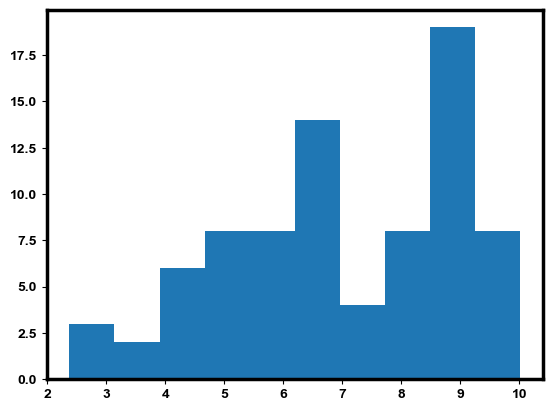

In [134]:
plt.hist(samples['DFT_gap'])

In [136]:
samples.to_csv('/home/kianoosh/Github/RRCGAN_hlg_V01/analysis/Draw_SMILES/20Samples/80_samples.csv')

In [35]:
output['mean'] = output['pred_gap']
output['mean'] = 5.95
output['RE_target_mean'] = abs(output['des_gap']-output['mean'])/output['mean']*100

[0.24405705]
[0.12361331]
[0.09191759]
[0.54041204]


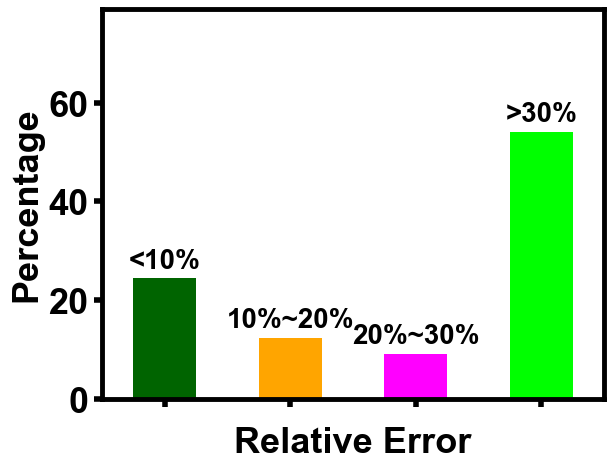

In [36]:
# make the numbers on axis bold
#rc('font', weight='bold')

re_less_10 = np.sum(output['RE_target_mean'].values <= 10)
print (re_less_10/output['RE_target_mean'].shape)

re_less_20_big_10 = np.sum( (output['RE_target_mean'].values > 10) &  (output['RE_target_mean'].values <= 20) )
print (re_less_20_big_10/output['RE_target_mean'].shape)

re_less_30_big_20 = np.sum( (output['RE_target_mean'].values > 20) &  (output['RE_target_mean'].values <= 30) )
print (re_less_30_big_20/output['RE_target_mean'].shape)

re_big_30 = np.sum(output['RE_target_mean'].values > 30)
print (re_big_30/output['RE_target_mean'].shape)


plt.close()

plt.bar(['<10%', '10% - 20%', '20% - 30%', '>30%'],
        [re_less_10/len(output), re_less_20_big_10/len(output), re_less_30_big_20/len(output), 
         re_big_30/len(output), ],
        color = ['green', 'blue', 'red'],
        alpha = 0.7)

plt.close()
plt.figure(figsize = (7.8*0.8, 6*0.8))
frequencies = [re_less_10/len(output)*100, re_less_20_big_10/len(output)*100, 
               re_less_30_big_20/len(output)*100, re_big_30/len(output)*100]
freq_series = pd.Series(frequencies)
ax = freq_series.plot(kind='bar', color = ['darkgreen', 'orange', 'magenta', 'lime'])

rects = ax.patches
x_labels = [ ]
labels = ['<10%', '10%~20%', '20%~30%', '>30%']

# define the width of the border
[i.set_linewidth(3.5) for i in ax.spines.values()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label, fontsize=20, fontweight='bold',
            ha='center', va='bottom')

ax.set_xticklabels(x_labels)
plt.ylim(0,79)
ax.tick_params(axis='both', which='major', labelsize=26, width=4, length=6)
#plt.yticks(fontsize = 22)
plt.ylabel("Percentage", fontsize=26, fontweight='bold', fontname='Arial')
plt.xlabel("Relative Error", fontsize=26, fontweight='bold', labelpad=10, fontname='Arial')

plt.tight_layout()
plt.savefig('RE_target_mean.jpeg', dpi=500, bbox_inches='tight')